# test auto encoder

## chargements des donnees 

In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits

(array([488., 412., 311., 260., 306., 244., 261., 282., 224., 281.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <BarContainer object of 10 artists>)

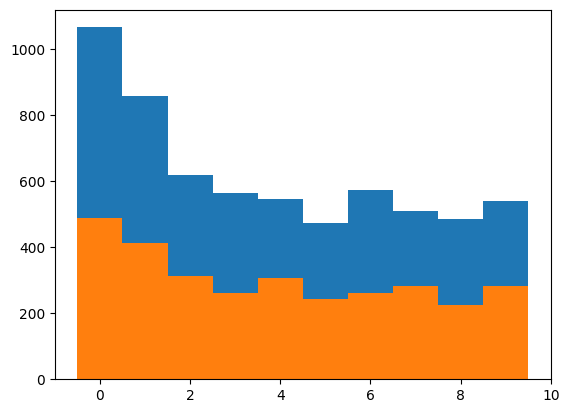

In [2]:
# Chargement des données
data = pkl.load(open("../data/usps.pkl",'rb')) 
# data est un dictionnaire contenant les champs explicites X_train, X_test, Y_train, Y_test
X_train = np.array(data["X_train"],dtype=float) # changement de type pour éviter les problèmes d'affichage
X_test = np.array(data["X_test"],dtype=float)
Y_train = data["Y_train"]
Y_test = data["Y_test"]


# onehot encoding
Y_train_onehot = onehot(Y_train)
Y_test_onehot = onehot(Y_test)
Y_train_onehot = Y_train_onehot.astype(int)


# normalisation des données
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)


# visualisation de la distribution des étiquettes (dans les 10 classes de chiffres)
plt.figure()
plt.hist(Y_train, np.linspace(-0.5,9.5,11))
plt.hist(Y_test, np.linspace(-0.5,9.5,11))
#plt.savefig("distr_classes.png")

(6229, 256)
(3069, 256) (6229,) (3069,)


Text(0.5, 1.0, 'Image de : 6')

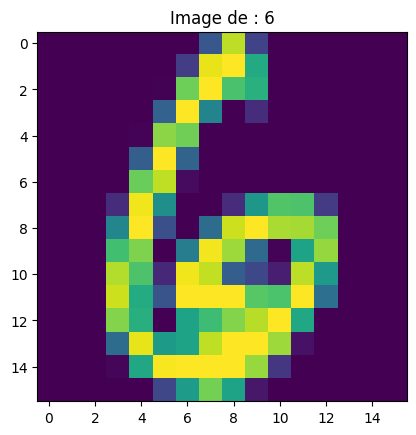

In [3]:
# prise en main des matrices X, Y
print(X_train.shape)
# 6229 images composées de 256 pixels (image = 16x16)
print(X_test.shape,Y_train.shape, Y_test.shape)

# Affichage de l'image 18 de la base de données et récupération de l'étiquette associée:
# (1) remise en forme de la ligne de 256 pixels en 16x16
# (2) affichage avec imshow (en niveaux de gris)
# (3) récupération de l'étiquette dans Y_train

plt.figure()
plt.imshow(X_train[18].reshape(16,16))
plt.title("Image de : {}".format(Y_train[18]))

In [4]:
value , count = np.unique(Y_train, return_counts=True)

print(value)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
linear1 = Linear(256, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
bce_loss = BCELoss()

loss_list= []
encoder = [linear1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 256), sigmoid]
net = Sequential(encoder+decoder)

### parcours full batch 

In [6]:
# Boucle d'entraînement en full batc
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    yhat = net.forward(X_train)

    # Calculer la perte
    loss = bce_loss.forward(X_train, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f" % (epoch, np.mean(loss)))

    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = bce_loss.backward(X_train, yhat)
    delta = net.backward(X_train, delta, gradient_step = 0.1)


Epoch 0: Loss = 0.708291
Epoch 10: Loss = 0.467259
Epoch 20: Loss = 0.457715
Epoch 30: Loss = 0.431389
Epoch 40: Loss = 0.438360
Epoch 50: Loss = 0.411017
Epoch 60: Loss = 0.393959
Epoch 70: Loss = 0.384828
Epoch 80: Loss = 0.391103
Epoch 90: Loss = 0.379631
Epoch 100: Loss = 0.379681
Epoch 110: Loss = 0.360348
Epoch 120: Loss = 0.364439
Epoch 130: Loss = 0.361215
Epoch 140: Loss = 0.345407
Epoch 150: Loss = 0.343842
Epoch 160: Loss = 0.356225
Epoch 170: Loss = 0.344003
Epoch 180: Loss = 0.342435
Epoch 190: Loss = 0.358249
Epoch 200: Loss = 0.359651
Epoch 210: Loss = 0.329808
Epoch 220: Loss = 0.330393
Epoch 230: Loss = 0.327657
Epoch 240: Loss = 0.328999
Epoch 250: Loss = 0.324069
Epoch 260: Loss = 0.322112
Epoch 270: Loss = 0.330228
Epoch 280: Loss = 0.322541
Epoch 290: Loss = 0.317654
Epoch 300: Loss = 0.336300
Epoch 310: Loss = 0.308852
Epoch 320: Loss = 0.313622
Epoch 330: Loss = 0.307812
Epoch 340: Loss = 0.305418
Epoch 350: Loss = 0.311545
Epoch 360: Loss = 0.310426
Epoch 370: L

0.0

[0.7082910707671164, 0.6683663965012113, 0.5224947379605395, 0.4924107258988544, 0.5194858686596951, 0.5030011719123242, 0.48210140749106273, 0.47900683225974344, 0.48253344872293685, 0.47282090366803964, 0.46725902393539304, 0.46975568077589114, 0.5015998233456411, 0.49538849963443804, 0.47401274158254164, 0.4626939393584703, 0.4533567911944624, 0.4480763389587535, 0.44775015330219725, 0.44741000442257706, 0.45771503815195286, 0.46043816714873265, 0.463745667200579, 0.4512578226384253, 0.4429166586034409, 0.438309892910934, 0.4323374323589162, 0.4294519786586772, 0.42905695371182784, 0.4271949557570749, 0.4313891485598784, 0.42944227225503984, 0.4389374035949302, 0.43028594377908647, 0.42532251468405996, 0.42323754348372084, 0.4310547558057404, 0.4220407021387976, 0.419437203840391, 0.4266667496094457, 0.43835962641907533, 0.42833236380153816, 0.42801310846513496, 0.4290757343088648, 0.42099451364064117, 0.4144661135767445, 0.40946402630246803, 0.4062035243239609, 0.40646345162580316,

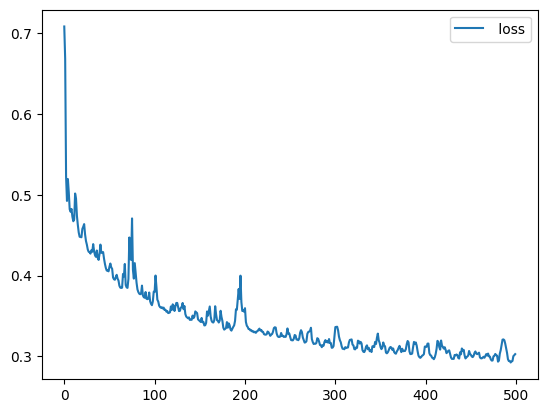

In [7]:
print(loss_list)
plt.plot(loss_list,label =' loss')
plt.legend()
plt.show()

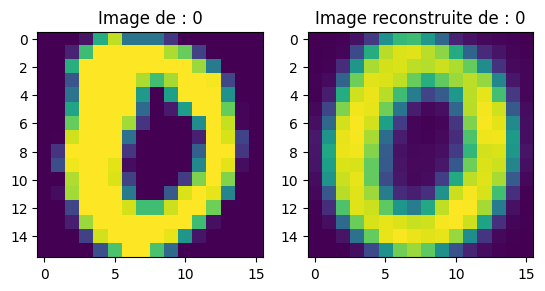

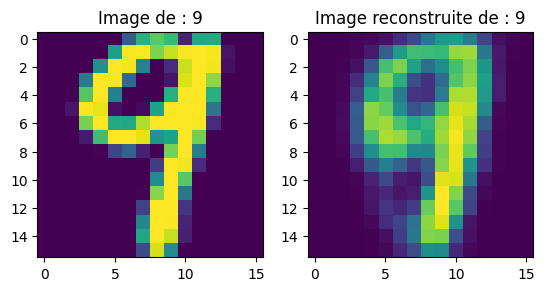

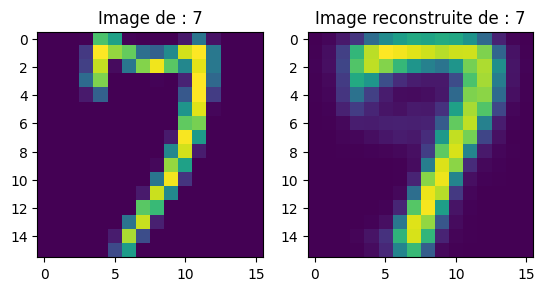

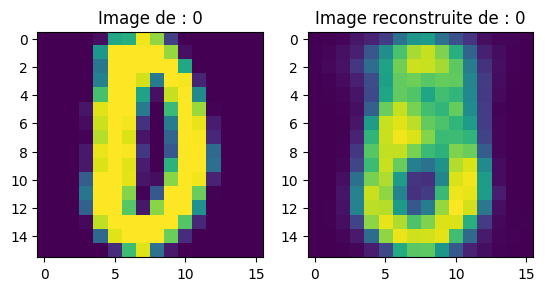

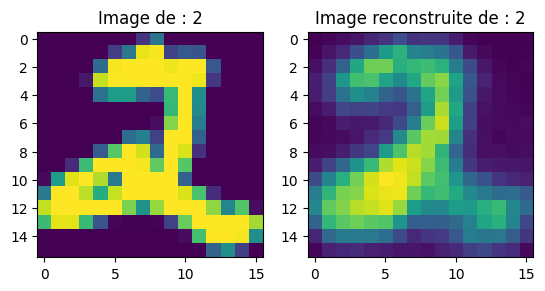

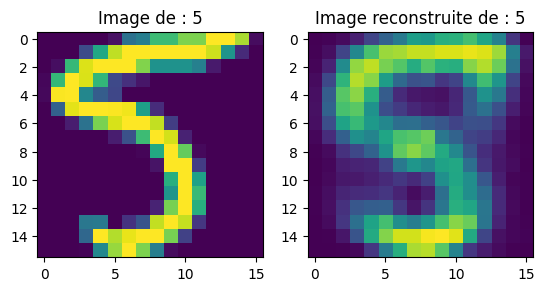

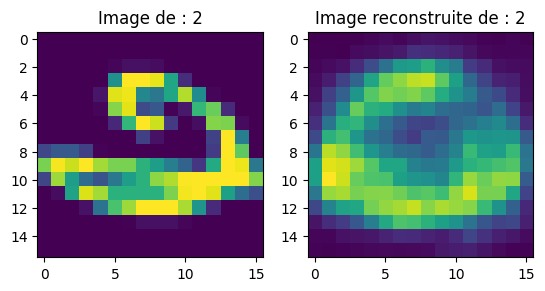

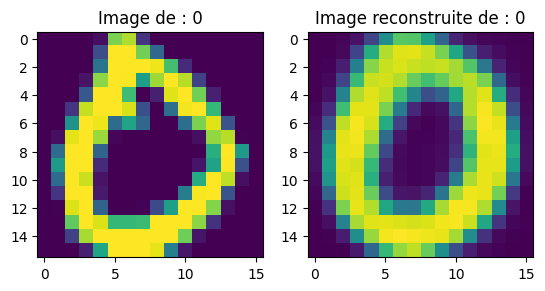

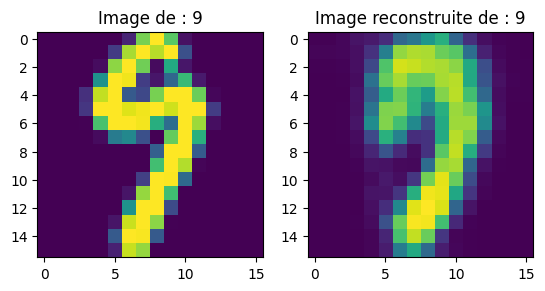

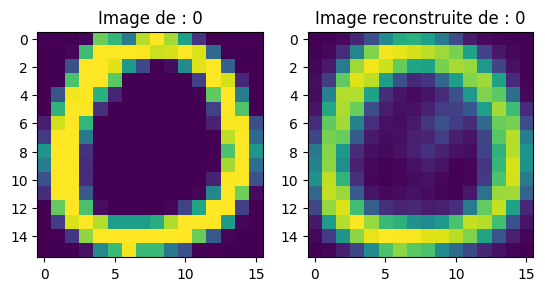

In [12]:
# affichage  des images  qui compare les images reconstruites et les images d'origine sur les donnees d'entrainement
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_train[i].reshape(16,16))
    plt.title("Image de : {}".format(Y_train[i]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_train)[i].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_train[i]))

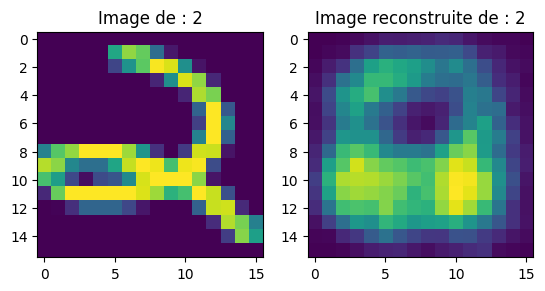

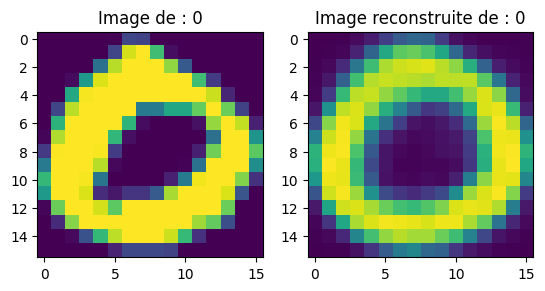

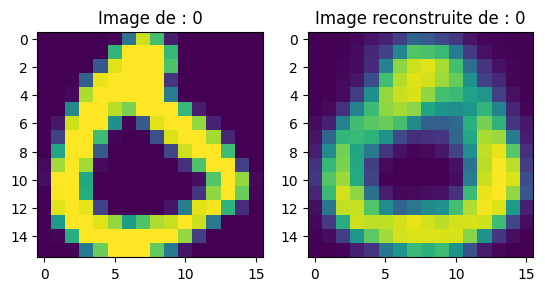

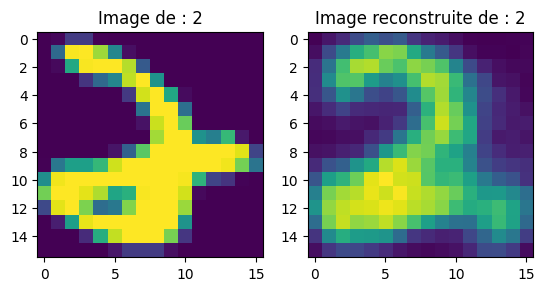

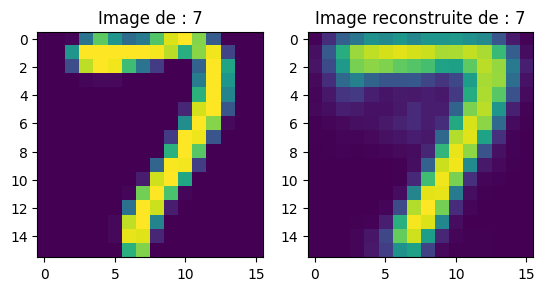

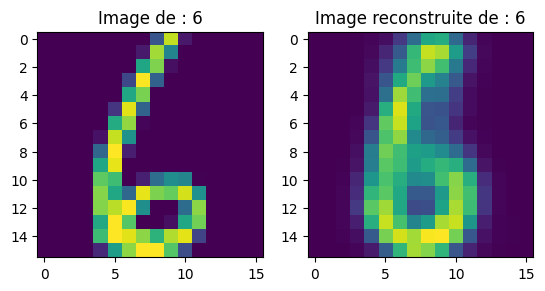

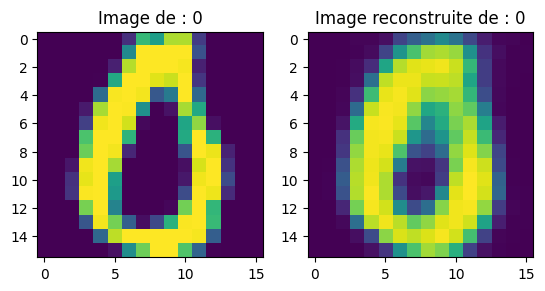

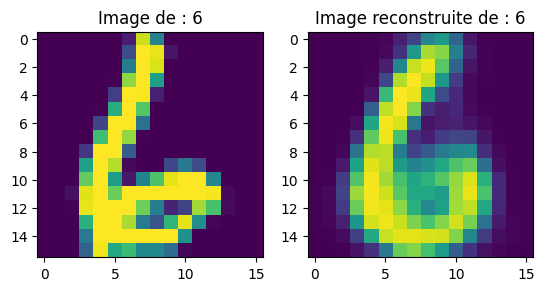

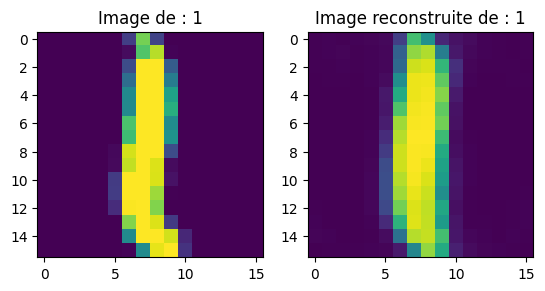

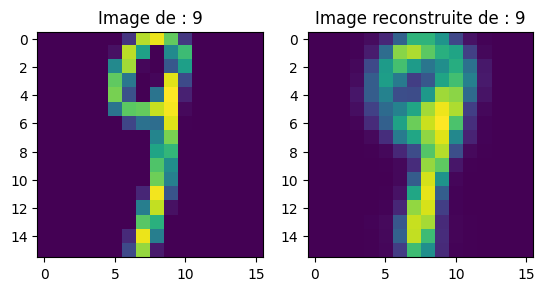

In [13]:
# affichage  des images  qui compare les images reconstruites et les images d'origine sur les donnees de test
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_test[i].reshape(16,16))
    plt.title("Image de : {}".format(Y_test[i]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_test)[i].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_test[i]))

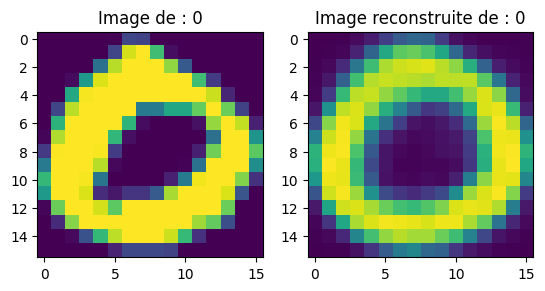

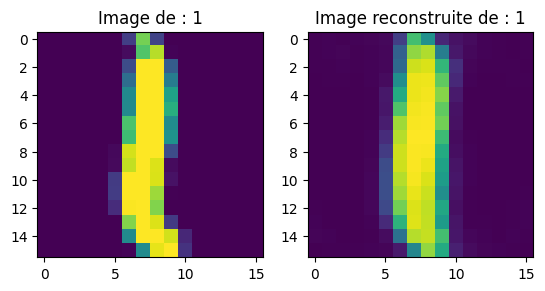

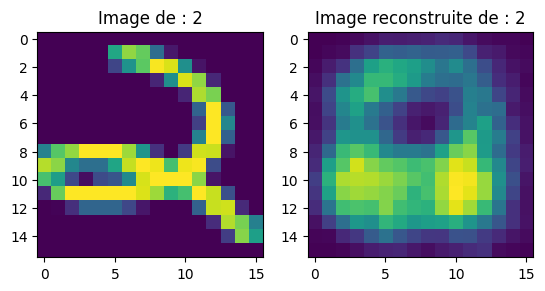

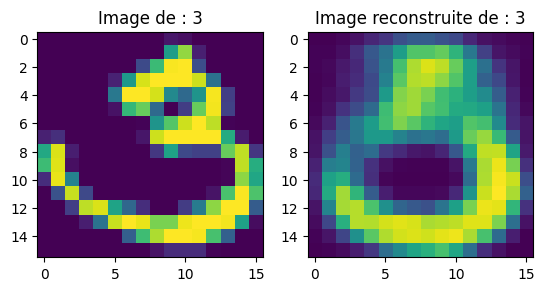

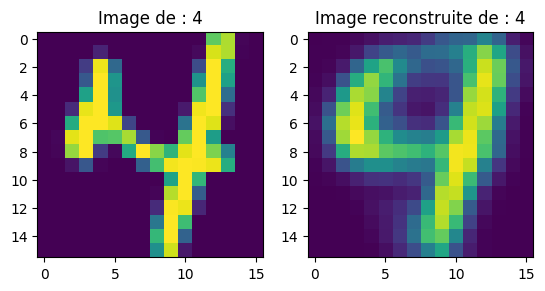

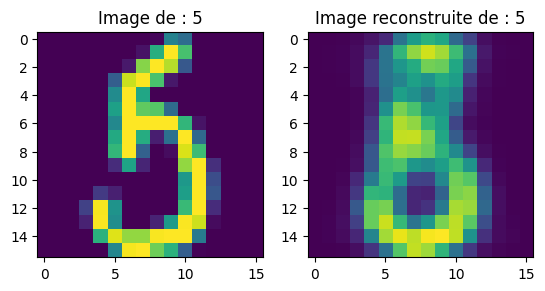

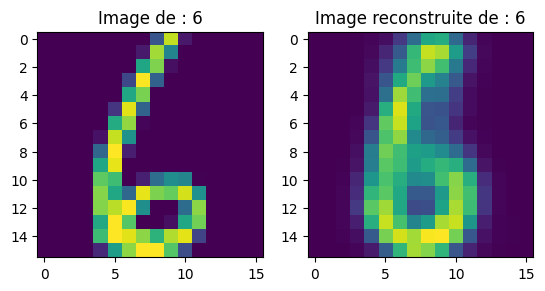

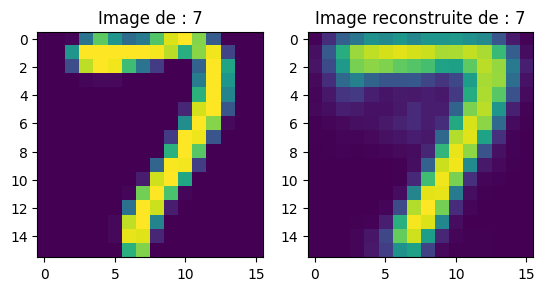

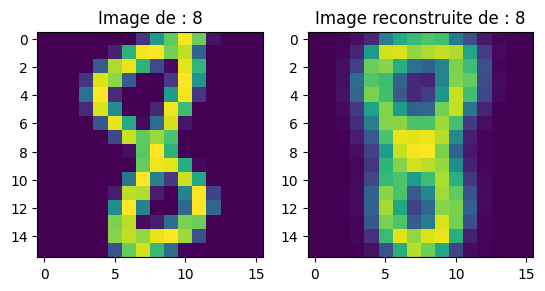

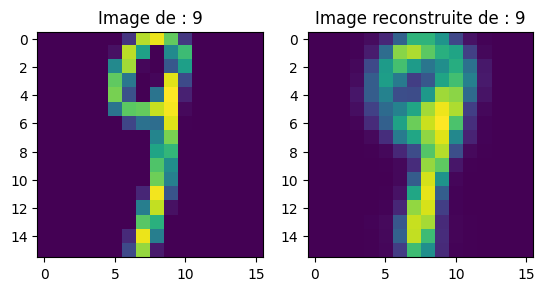

In [14]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_test[Y_test==i][0].reshape(16,16))
    plt.title("Image de : {}".format(Y_test[Y_test==i][0]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_test)[Y_test==i][0].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_test[Y_test==i][0]))

### parcours en mini-batch 

In [3]:
linear1 = Linear(256, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
bce_loss = BCELoss()

loss_list= []
encoder = [linear1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 256), sigmoid]
net = Sequential(encoder+decoder)

In [4]:
Lerror , Lscore = SGD(net, bce_loss,X_train, X_train, eps = 0.001 , batch_size = 10, max_iter=500)

Iteration: 0 / 500
cost  0.439
Iteration: 1 / 500
cost  0.398
Iteration: 2 / 500
cost  0.374
Iteration: 3 / 500
cost  0.357
Iteration: 4 / 500
cost  0.343
Iteration: 5 / 500
cost  0.332
Iteration: 6 / 500
cost  0.323
Iteration: 7 / 500
cost  0.316
Iteration: 8 / 500
cost  0.31
Iteration: 9 / 500
cost  0.306
Iteration: 10 / 500
cost  0.303
Iteration: 11 / 500
cost  0.299
Iteration: 12 / 500
cost  0.296
Iteration: 13 / 500
cost  0.294
Iteration: 14 / 500
cost  0.292
Iteration: 15 / 500
cost  0.289
Iteration: 16 / 500
cost  0.287
Iteration: 17 / 500
cost  0.285
Iteration: 18 / 500
cost  0.283
Iteration: 19 / 500
cost  0.285
Iteration: 20 / 500
cost  0.279
Iteration: 21 / 500
cost  0.279
Iteration: 22 / 500
cost  0.276
Iteration: 23 / 500
cost  0.275
Iteration: 24 / 500
cost  0.274
Iteration: 25 / 500
cost  0.273
Iteration: 26 / 500
cost  0.273
Iteration: 27 / 500
cost  0.272
Iteration: 28 / 500
cost  0.27
Iteration: 29 / 500
cost  0.27
Iteration: 30 / 500
cost  0.269
Iteration: 31 / 500
c

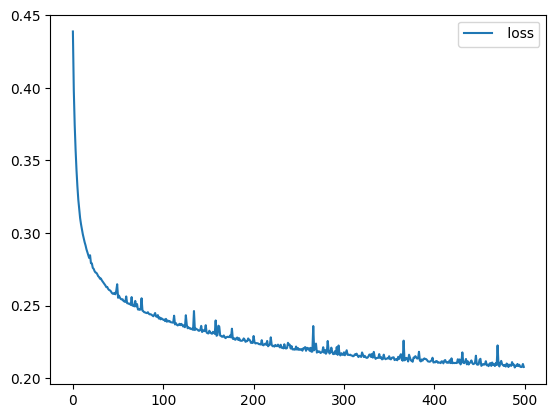

In [5]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()

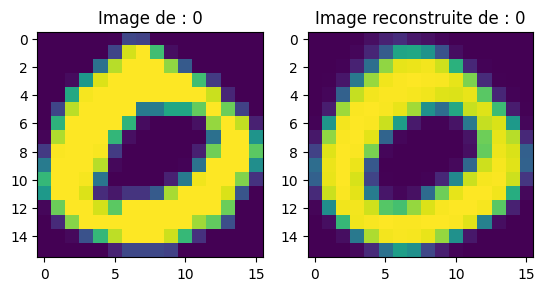

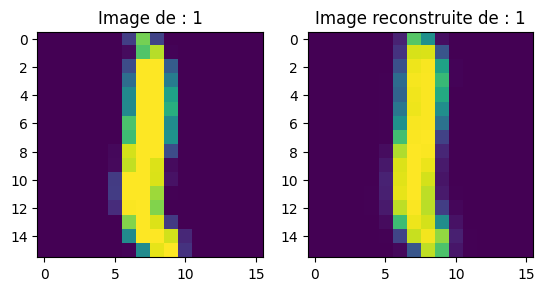

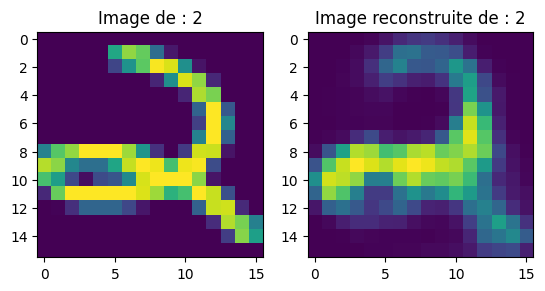

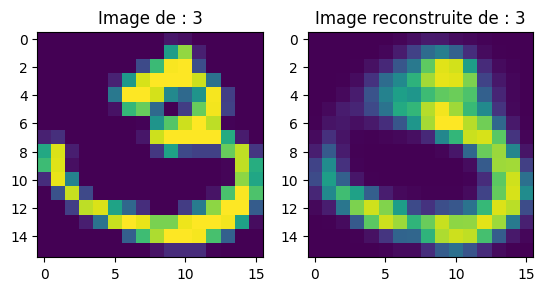

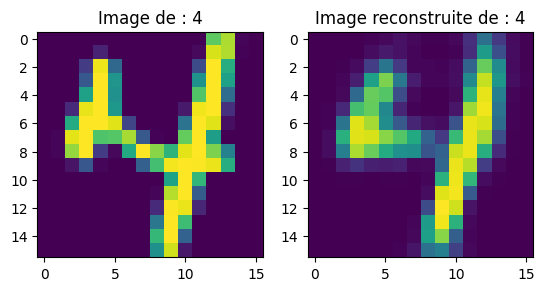

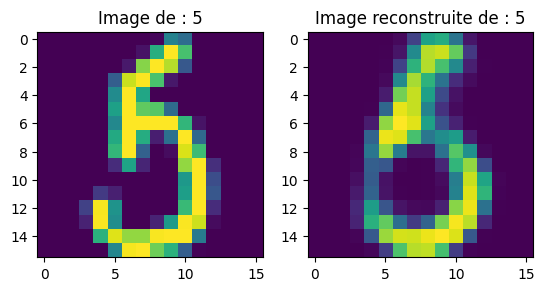

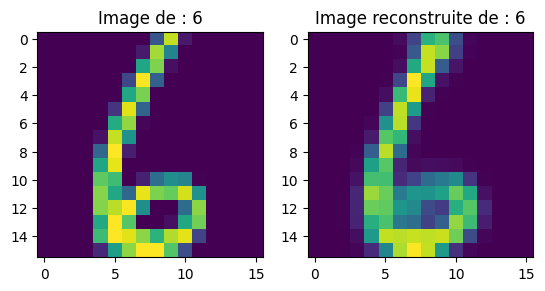

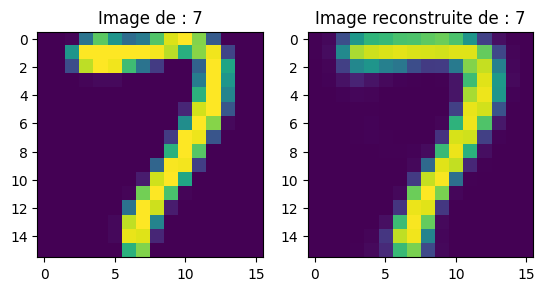

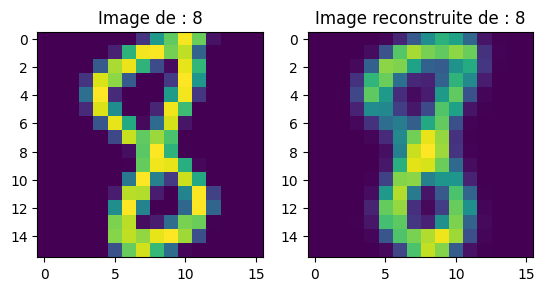

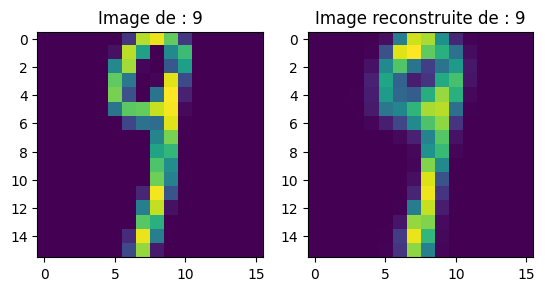

In [6]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(X_test[Y_test==i][0].reshape(16,16))
    plt.title("Image de : {}".format(Y_test[Y_test==i][0]))
    plt.subplot(1,2,2)
    plt.imshow(net.forward(X_test)[Y_test==i][0].reshape(16,16))
    plt.title("Image reconstruite de : {}".format(Y_test[Y_test==i][0]))

**Auto encoder qui a plutot un bon effet sur les donnees usps**